In [7]:
from pathlib import Path
import pandas as pd

root = Path.cwd()
if root.name == "notebooks":   # si estás dentro de notebooks/, sube un nivel
    root = root.parent

red = root / "data" / "raw" / "winequality-red.csv"
white = root / "data" / "raw" / "winequality-white.csv"

df = pd.read_csv(red, sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
from pathlib import Path
import pandas as pd

# Ruta raíz del proyecto
root = Path.cwd()
if root.name == "notebooks":  # si el notebook está dentro de notebooks/
    root = root.parent

# Rutas de los archivos
red_path = root / "data" / "raw" / "winequality-red.csv"
white_path = root / "data" / "raw" / "winequality-white.csv"

# Verificación
print("Rutas encontradas:")
print(red_path)
print(white_path)

# Carga de datasets
df_red = pd.read_csv(red_path, sep=";")
df_white = pd.read_csv(white_path, sep=";")

# Etiqueta de tipo de vino
df_red["wine_type"] = "red"
df_white["wine_type"] = "white"

# Unión de ambos
df = pd.concat([df_red, df_white], ignore_index=True)

print(f"✅ Datos cargados correctamente: {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()


Rutas encontradas:
/Users/maxi910/wine_quality_project/wine_quality_pro/data/raw/winequality-red.csv
/Users/maxi910/wine_quality_project/wine_quality_pro/data/raw/winequality-white.csv
✅ Datos cargados correctamente: 6497 filas y 13 columnas


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
#Haremos un análisis exploratorio básico para entender mejor los datos con los que estamos trabajando.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [16]:
# Información general
df.info()

# Recuento por tipo de vino
print(df["wine_type"].value_counts())


# Estadísticas básicas
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
wine_type
white    4898
red      1599
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [24]:
# Estadísticas separadas por tipo de vino
df.groupby("wine_type").describe().T




wine_type                    red        white
fixed acidity count  1599.000000  4898.000000
              mean      8.319637     6.854788
              std       1.741096     0.843868
              min       4.600000     3.800000
              25%       7.100000     6.300000
...                          ...          ...
quality       min       3.000000     3.000000
              25%       5.000000     5.000000
              50%       6.000000     6.000000
              75%       6.000000     6.000000
              max       8.000000     9.000000

[96 rows x 2 columns]

In [23]:
# Estadísticas generales del dataset completo
display(df.describe().T.round(3))

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215,1.296,3.800,6.400,7.000,7.700,15.900
volatile acidity,6497.0,0.340,0.165,0.080,0.230,0.290,0.400,1.580
citric acid,6497.0,0.319,0.145,0.000,0.250,0.310,0.390,1.660
residual sugar,6497.0,5.443,4.758,0.600,1.800,3.000,8.100,65.800
chlorides,6497.0,0.056,0.035,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497.0,30.525,17.749,1.000,17.000,29.000,41.000,289.000
total sulfur dioxide,6497.0,115.745,56.522,6.000,77.000,118.000,156.000,440.000
density,6497.0,0.995,0.003,0.987,0.992,0.995,0.997,1.039
pH,6497.0,3.219,0.161,2.720,3.110,3.210,3.320,4.010
sulphates,6497.0,0.531,0.149,0.220,0.430,0.510,0.600,2.000


In [19]:
# Comparar medias entre vino tinto y blanco
df.groupby("wine_type")[["alcohol", "volatile acidity", "residual sugar", "pH", "density"]].mean().round(2)


,alcohol,volatile acidity,residual sugar,pH,density
wine_type,,,,,
red,10.42,0.53,2.54,3.31,1.00
white,10.51,0.28,6.39,3.19,0.99


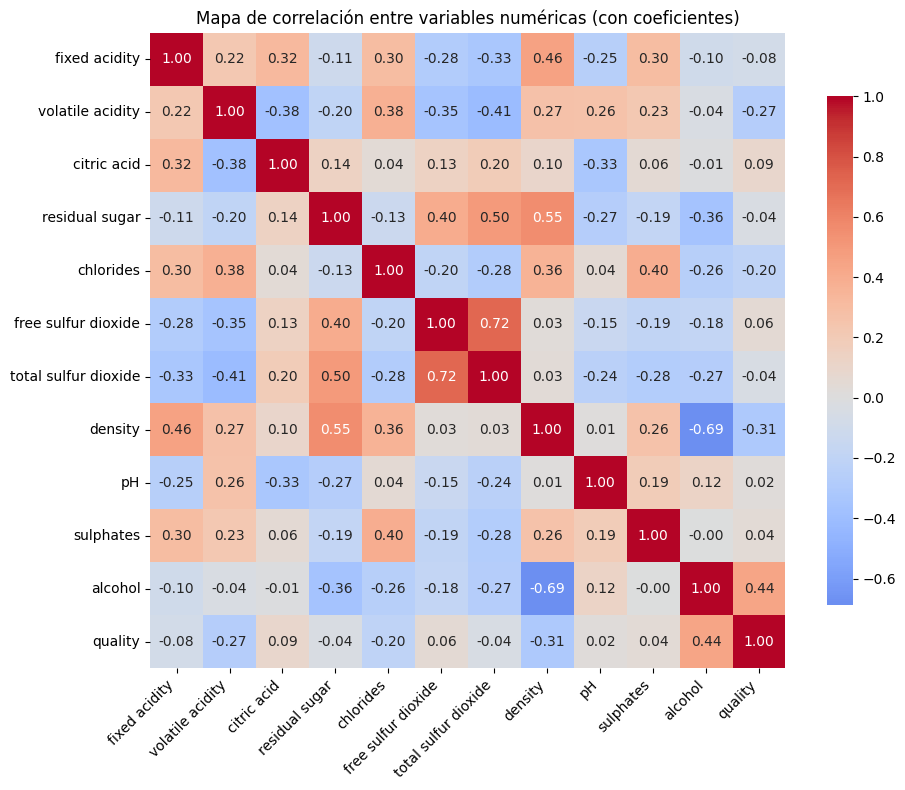

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    center=0,            
    square=True,         
    cbar_kws={'shrink': 0.8}
)

plt.title("Mapa de correlación entre variables numéricas (con coeficientes)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



/var/folders/69/p7xnn2_j43bgqtw_v5s1zg8w0000gn/T/ipykernel_16194/3186824523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


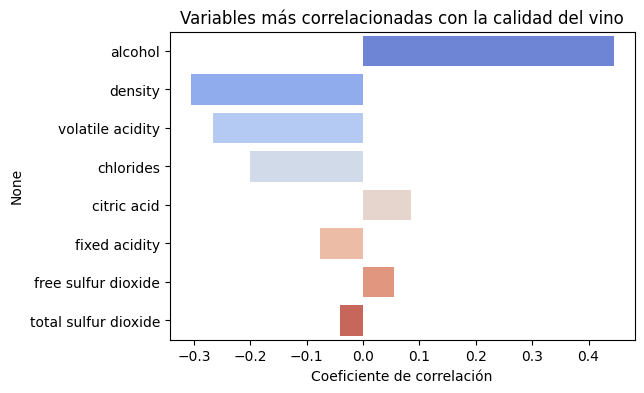

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualización de correlación con la calidad
top_corr = corr_target.drop("quality").sort_values(key=abs, ascending=False).head(8)
plt.figure(figsize=(6,4))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.title("Variables más correlacionadas con la calidad del vino")
plt.xlabel("Coeficiente de correlación")
plt.show()


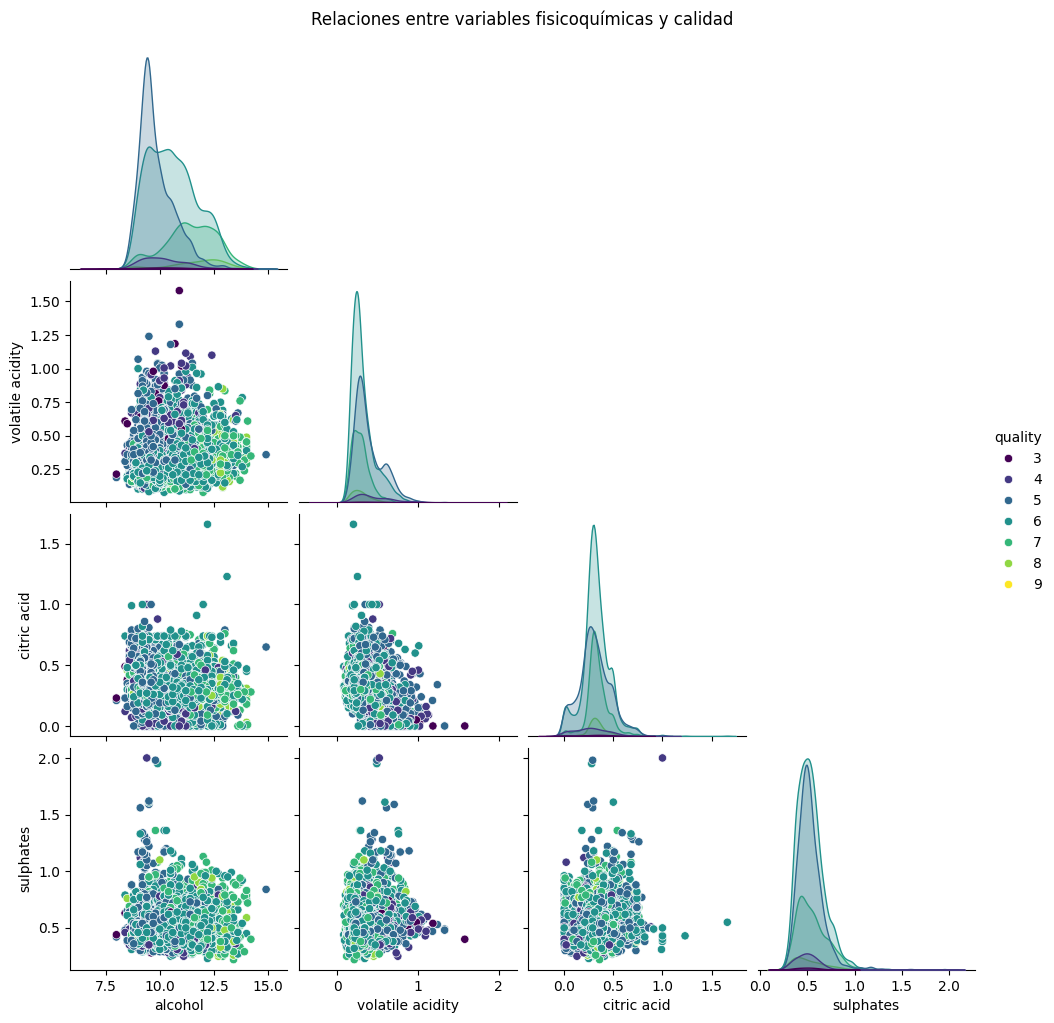

In [29]:
sns.pairplot(
    df,
    vars=["alcohol", "volatile acidity", "citric acid", "sulphates"],
    hue="quality",
    palette="viridis",
    diag_kind="kde",
    corner=True
)
plt.suptitle("Relaciones entre variables fisicoquímicas y calidad", y=1.02)
plt.show()


/var/folders/69/p7xnn2_j43bgqtw_v5s1zg8w0000gn/T/ipykernel_16194/1122767796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="wine_type", y=col, palette="Set2")


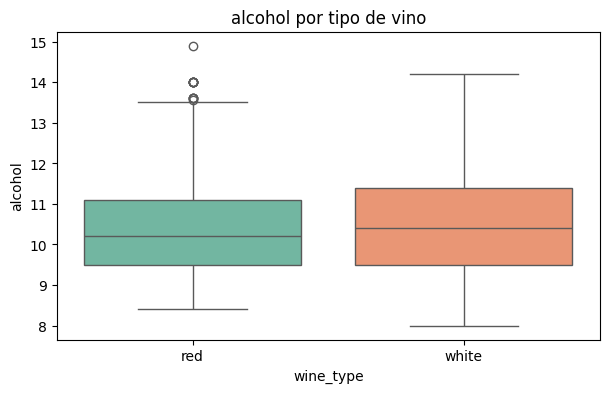

/var/folders/69/p7xnn2_j43bgqtw_v5s1zg8w0000gn/T/ipykernel_16194/1122767796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="wine_type", y=col, palette="Set2")


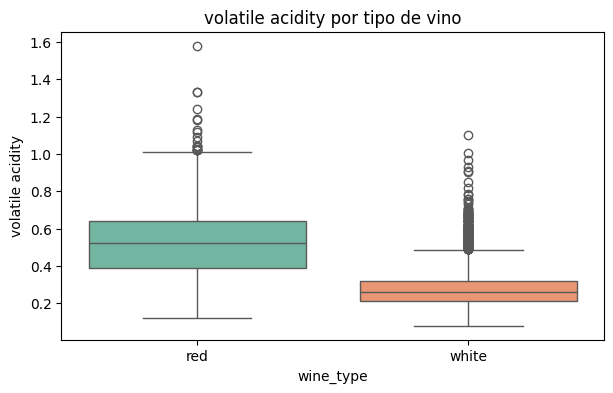

/var/folders/69/p7xnn2_j43bgqtw_v5s1zg8w0000gn/T/ipykernel_16194/1122767796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="wine_type", y=col, palette="Set2")


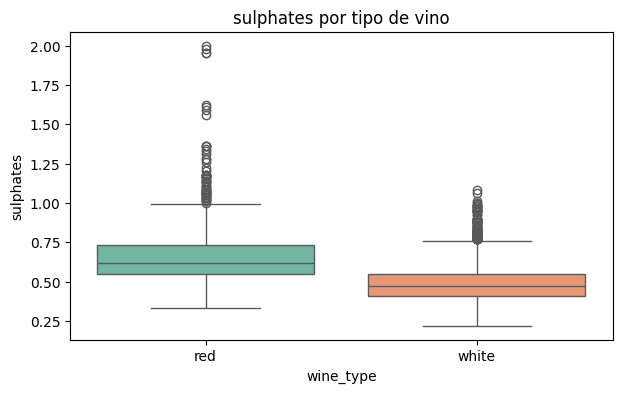

/var/folders/69/p7xnn2_j43bgqtw_v5s1zg8w0000gn/T/ipykernel_16194/1122767796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="wine_type", y=col, palette="Set2")


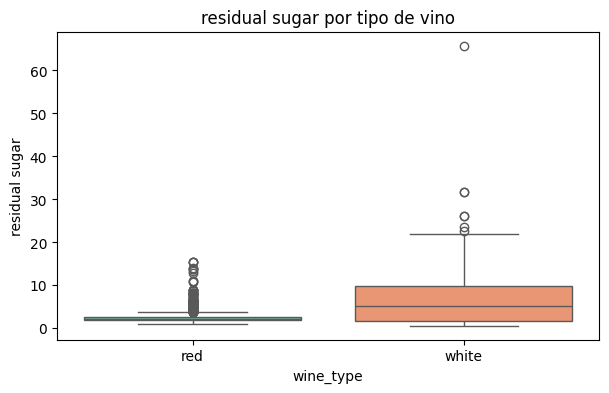

In [30]:
compare_vars = ["alcohol", "volatile acidity", "sulphates", "residual sugar"]

for col in compare_vars:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x="wine_type", y=col, palette="Set2")
    plt.title(f"{col} por tipo de vino")
    plt.show()
